### NY Rent




In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px    


In [2]:
Rent= pd.read_csv("Resources/medianAskingRent_All.csv")


## Filter for Neighborhoods data only 
Rent=Rent[(Rent.areaType == 'neighborhood')] 

## Rearrange Dates as single column 
Rent = Rent.melt(id_vars=["areaName", "Borough","areaType"], 
        var_name="Date", 
        value_name="Price")

Rent = Rent[(Rent.Date >= '2018-01')]

Rent['Date'] = pd.to_datetime(Rent.Date) 
Rent.head()




,areaName,Borough,areaType,Date,Price
0,Battery Park City,Manhattan,neighborhood,2018-01-01,4150.0
1,Central Harlem,Manhattan,neighborhood,2018-01-01,2400.0
2,Central Park South,Manhattan,neighborhood,2018-01-01,7000.0
3,Chelsea,Manhattan,neighborhood,2018-01-01,3945.0
4,Chinatown,Manhattan,neighborhood,2018-01-01,2673.0


In [3]:
Rent.Price.mean()


3737.6223316912974

In [4]:
## calculate the average price in a month 

monthly = Rent.groupby(Rent['Date'])['Price'].mean()
monthly = monthly.reset_index()

## first group by borough and date 
borough = Rent.groupby(['Date','Borough'])['Price'].mean()
borough = borough.reset_index()
borough

,Date,Borough,Price
0,2018-01-01,Manhattan,3485.066667
1,2018-02-01,Manhattan,3494.193548
2,2018-03-01,Manhattan,3492.741935
3,2018-04-01,Manhattan,3523.225806
4,2018-05-01,Manhattan,3584.733333
5,2018-06-01,Manhattan,3587.966667
6,2018-07-01,Manhattan,3602.419355
7,2018-08-01,Manhattan,3644.354839
8,2018-09-01,Manhattan,3642.612903
9,2018-10-01,Manhattan,3609.064516


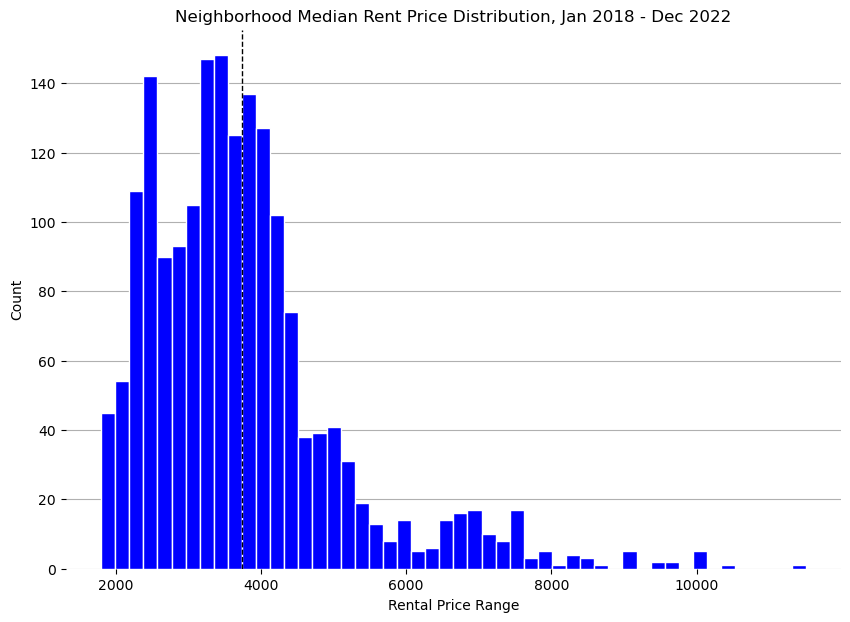

In [5]:
### distribution of the median rental pricing 

fig, ax = plt.subplots(figsize=(10, 7))    


ax.hist(Rent.Price, bins=50 , 
        color="blue", edgecolor='white', lw=1)

ax.set(xlabel='Rental Price Range', ylabel='Count', title='Neighborhood Median Rent Price Distribution, Jan 2018 - Dec 2022')

plt.axvline(Rent.Price.mean(), color='k', linestyle='dashed', linewidth=1)

ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

Text(0.5, 1.0, 'The Median Price Distribution by Borough, Jan 2018 - Dec 2022')

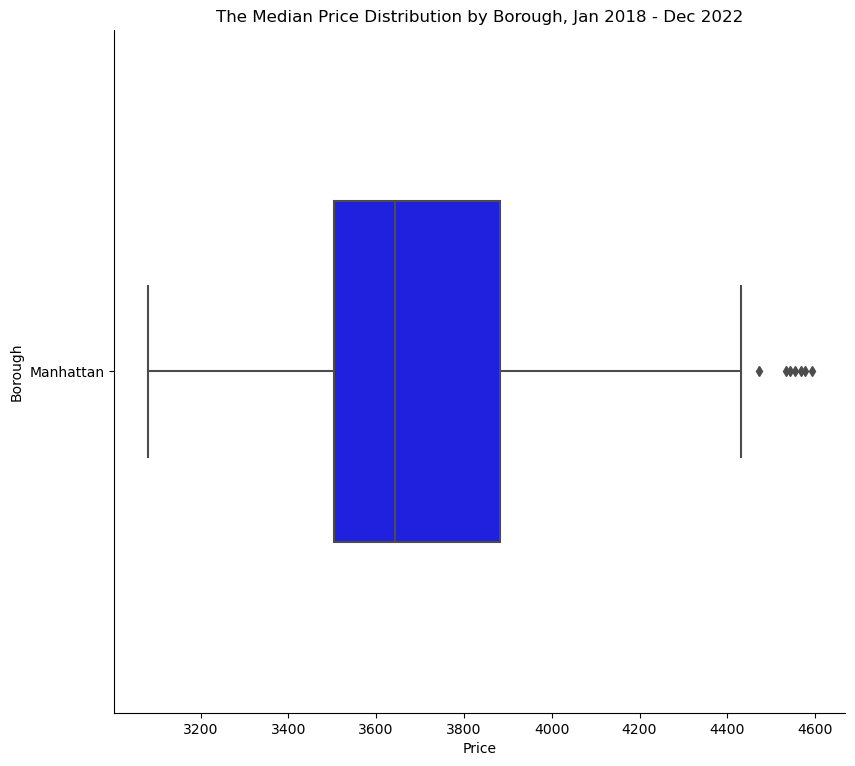

In [6]:
### Box Plot to show Median Price Distribution- DO NOT GRADE

b = sns.catplot(x="Price", y="Borough", 
                color = 'blue',
                width=0.5,
                kind='box',
                data=borough)

b.fig.set_figwidth(10)
b.fig.set_figheight(8)  

plt.title('The Median Price Distribution by Borough, Jan 2018 - Dec 2022')

Text(0.5, 1.0, 'The Median Price Distribution by Borough, Jan 2018 - Dec 2022')

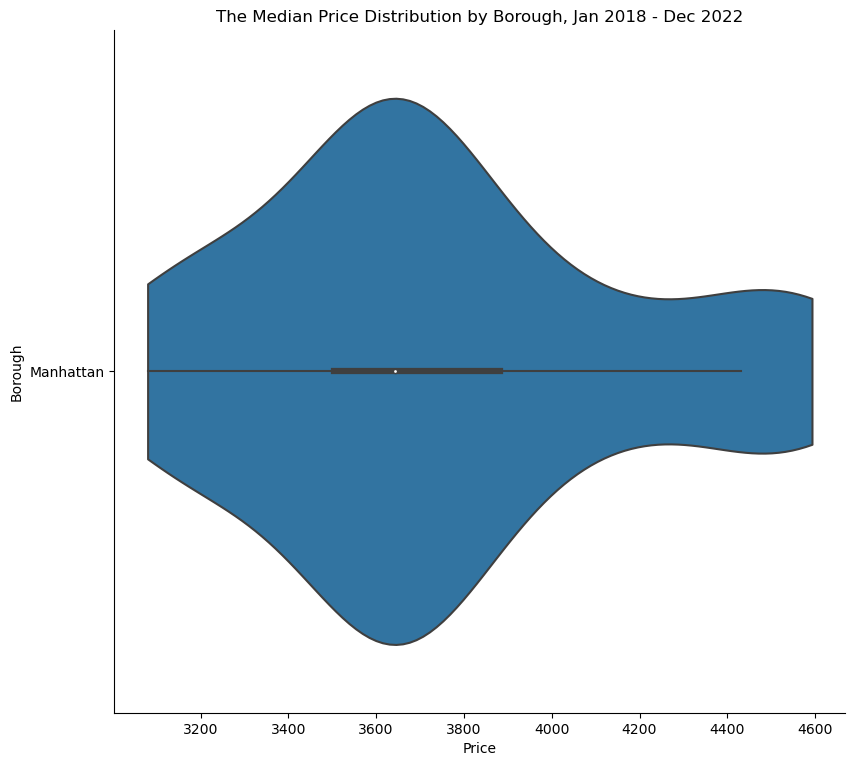

In [7]:
my_order = borough.groupby(by=["Borough"])["Price"].mean().iloc[::-1].index
my_order = my_order.sort_values()

k = sns.catplot(x= "Price", y="Borough", 
                kind= 'violin',
                cut= 0, hue_order=True,
                data= borough,
                order= my_order)

k.fig.set_figwidth(10)
k.fig.set_figheight(8)     

plt.title('The Median Price Distribution by Borough, Jan 2018 - Dec 2022')

In [8]:
print(borough.groupby(by=["Borough"])["Price"].mean())


Borough
Manhattan    3739.463513
Name: Price, dtype: float64


### Examining Trends of Median Pricing through Time Series


[Text(0, 0.5, 'Median Rental Price'),
 Text(0.5, 1.0, 'Median-Rental Price by borough, Jan 2018 - Dec2022')]

<Figure size 12800x9600 with 0 Axes>

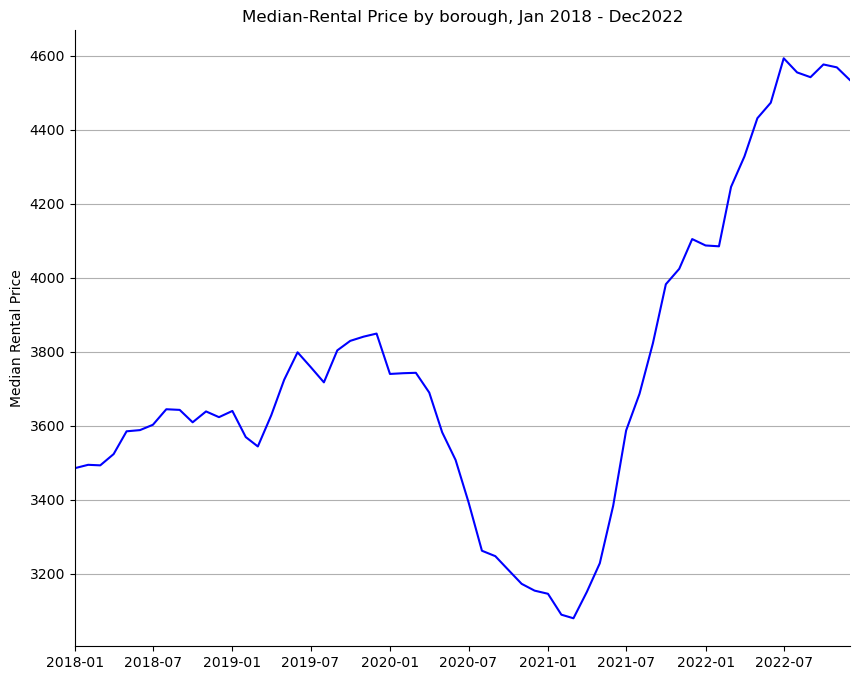

In [9]:
### A Time Series: Six Year Examination

# individual boroughs

Manhattan = borough[(borough.Borough == 'Manhattan')] 


## time series
plt.figure(dpi=2000)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Manhattan.Date, Manhattan.Price, 'blue',label='Manhattan')


## aesthetic design
#ax.set_ylim(0, 4600)                                     # set y axis limits
ax.set_xlim(borough.Date.min(), borough.Date.max())       # set x axis limits

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.grid(axis='y')                                      
ax.set_axisbelow(True)       
ax.set(ylabel='Median Rental Price', title = 'Median-Rental Price by borough, Jan 2018 - Dec2022')


NameError: name 'datetime' is not defined

<Figure size 7680x5760 with 0 Axes>

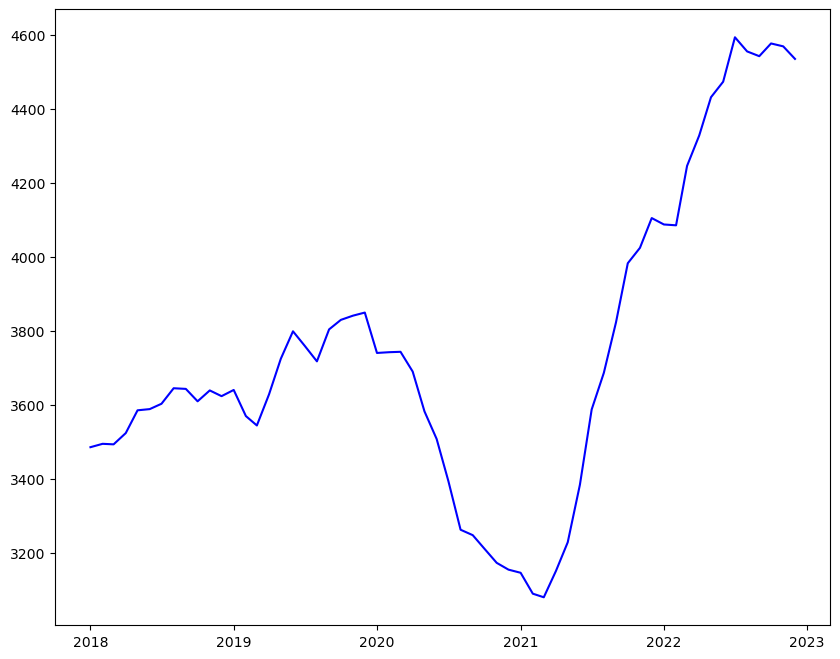

In [10]:
### A Time Series: Six Year Examination

# individual boroughs
 
Manhattan = borough[(borough.Borough == 'Manhattan')] 

## time series
plt.figure(dpi=1200)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Manhattan.Date, Manhattan.Price, 'blue',label='Manhattan')
start_date = datetime.datetime.strptime("2018-01", "%Y-%m")
end_date = datetime.datetime.strptime("2022-12", "%Y-%m")

# Set x-axis limits
ax.set_xlim(start_date, end_date)



ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.grid(axis='y')                                      
ax.set_axisbelow(True)       
ax.set(ylabel='Median Rental Price', title = 'Median-Rental Price by borough, Jan 2018 - Dec 2022')


#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.annotate("NYS Shutdown",                                                     # annotation with arrows
            xy=(pd.to_datetime('2020-03-23'), 3000), xycoords='data',
            xytext=(0.87, 0.55), textcoords='figure fraction',
            arrowprops=dict(arrowstyle="->")
            )


# adjust and sort legend

ax.legend(handles, labels, fontsize=14, loc='center left', bbox_to_anchor=(1, 0.75))


In [ ]:
### Horizontal Plot of the most expensive neighborhoods (COVID PERIOD)

#first group by neighborhood & compute mean price for each area
nhood = Rent.groupby(['areaName','Borough'])['Price'].mean().reset_index()

#next filter for the top  neighborhoods
tophoods = nhood.nlargest(33,'Price')
#lastly sort by highest to lowest
tophoods = tophoods.sort_values(by = 'Price', ascending=False)
tophoods

# horizontal bar chart
#plt.figure(dpi=400)
fig = plt.figure(figsize=(19.20,10.80))
fig, ax = plt.subplots(figsize=(11, 8))        

#ax.barh(y = tophoods.areaName,  width = tophoods.Price)       #using matplot         
sns.barplot(y='areaName', x="Price", hue="Borough", data=tophoods,dodge=False) #using seaborn

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.set(xlabel = 'Average Median-Price', ylabel='Neighborhood', 
      title = 'Top  Expensive Neighborhoods to Rent, Jan 2018 - Dec 2022') 

ax.grid(axis='x')                                      # show horizontal grid lines only
ax.set_axisbelow(True)                                 # show grid behind shape

In this section, we're still looking at the average median rental price but we have a horizontal bar chart representing the  most expensive neighborhoods to rent in Manhattan. This plot allows us to clearly see what are the most expensive neighborhoods.
From this, we see that the majority of the most expensive neighborhoods are Cental park South, Tribeca, Soho, Flatiron, Battery park city, chelsa, Midtown

If you're going to want to live in the top  expensive neighborhoods in NYC, expect to pay at least on average $4,400 for rent.

The rest of the plots below were other ways that I had first imagined to visualize the top  neighborhoods but I felt that the horizontal chart was the best one to use because it was simple, yet informative and to the point.

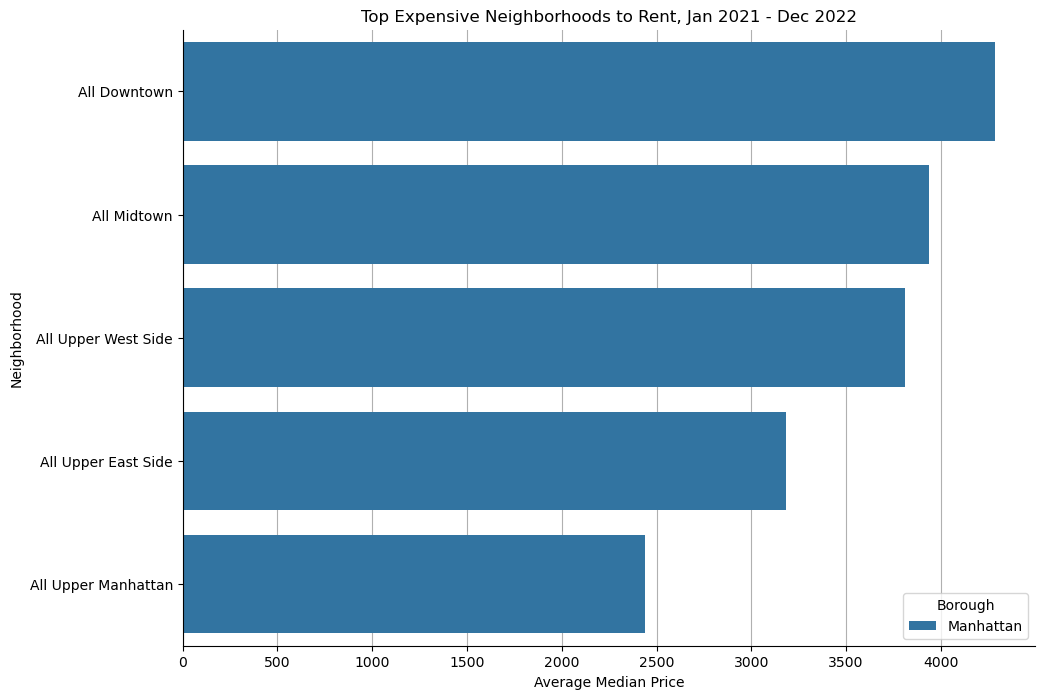

In [17]:
Rent_2021_2022 = Rent[(Rent['Date'] >= '2021-01-01') & (Rent['Date'] <= '2022-12-31')]

# Group by areaName and Borough, and calculate the mean price
nhood = Rent_2021_2022.groupby(['areaName', 'Borough'])['Price'].mean().reset_index()

# Next, filter for the top 30 neighborhoods
tophoods = nhood.nlargest(33, 'Price')

# Lastly, sort by highest to lowest
tophoods = tophoods.sort_values(by='Price', ascending=False)

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 8))
sns.barplot(y='areaName', x="Price", hue="Borough", data=tophoods, dodge=False, ax=ax)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels and title
ax.set(xlabel='Average Median Price', ylabel='Neighborhood', 
       title='Top Expensive Neighborhoods to Rent, Jan 2021 - Dec 2022')

# Show grid lines
ax.grid(axis='x')
ax.set_axisbelow(True)  # Show grid behind bars

In [18]:
 Plot the annual average prices
plt.figure(figsize=(10, 6))
for area in annual_average_prices['areaName'].unique():
    area_data = annual_average_prices[annual_average_prices['areaName'] == area]
    plt.plot(area_data['Year'], area_data['Price'], label=area)

# Add a horizontal line at y=4000
plt.hlines(4000, 2018, 2022, alpha=0.25)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Annual Average Rental Prices by Neighborhood')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
plt.grid(True)  # Show grid lines
plt.show()

SyntaxError: invalid syntax (3821766158.py, line 1)

In [19]:
nhood = Rent.groupby(['areaName','Year'])['Price'].mean().reset_index()
nhood

KeyError: 'Year'

In [ ]:
plt.figure(figsize=(10, 6))
for area in annual_average_prices['areaName'].unique():
    area_data = annual_average_prices[annual_average_prices['areaName'] == area]
    plt.plot(area_data['Year'], area_data['Price'], label=area)

# Add a horizontal line at y=4000
plt.hlines(4000, 2018, 2022, alpha=0.25)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Annual Average Rental Prices by Neighborhood')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
plt.grid(True)  # Show grid lines
plt.show()

In [20]:
 #Create an empty DataFrame to store the results
annual_average_prices = Rent.groupby(['areaName','Year'])['Price'].mean().reset_index()

x_axis = np.arange(2018,2022 , 0.1)
sin = np.sin(x_axis)
cos = np.cos(x_axis)
plt.hlines(4000, 2018, 2022, alpha=0.25)

# Each point on the sine chart is marked by a blue circle
sine_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, cos, marker='^', color='red', label="Cosine")
plt.legend(loc="lower right")
plt.show()


plt.figure(figsize=(10, 6))
for area in annual_average_prices['areaName'].unique():
    area_data = annual_average_prices[annual_average_prices['areaName'] == area]
    plt.plot(area_data['Year'], area_data['Price'], label=area)

# Add a horizontal line at y=4000
plt.hlines(4000, 2018, 2022, alpha=0.25)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Annual Average Rental Prices by Neighborhood')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
plt.grid(True)  # Show grid lines
plt.show()

KeyError: 'Year'

Submarket
